In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import final_project_functions as fun
import time
%load_ext autoreload
%autoreload 2

<h1>Developer Inactive</h1>


In [334]:
players = pd.read_csv("Data/players.csv")
players['height'] = players.height.apply(lambda cell: fun.fix_height(cell))

In [8]:
games = pd.read_csv("Data/games.csv")
players = pd.read_csv("Data/players.csv")
plays = pd.read_csv("Data/plays.csv")
weeks = pd.read_csv("Data/week1.csv")
weeks['week'] = 1

for i in range(2, 7):
    week_temp = pd.read_csv("Data/week{}.csv".format(i))
    week_temp['week'] = i
    weeks = pd.merge(weeks, week_temp, how='outer')
    print(i)

OFFENSE = ['QB', 'RB', 'WR', 'TE', 'FB']

# Necessary to clean height data
players['height'] = players.height.apply(lambda cell: fun.fix_height(cell))

2
3
4
5
6


- Measuring which players are the most effective at intercepting and sacking throughout the nfl, along with looking at stats such as the number of penalties and passes completed while they were on the field or against them to measure if they were responsible for the play

week_columns =['pass_forward', 'pass_arrived',
       'pass_outcome_caught',  'pass_outcome_incomplete',
       'tackle', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'touchdown',
       'fumble_defense_recovered', 'pass_outcome_touchdown',
        'penalty_flag', 'penalty_accepted']

In [55]:
players_extra = pd.read_csv("Data/playerInformation/players.csv")
combine = pd.read_csv("Data/playerInformation/combine.csv")
combine_extra = pd.read_csv("Data/playerInformation/combine_data_since_2000_PROCESSED_2018-04-26.csv")

In [219]:
combine_more = pd.read_json("Data/playerInformation/profiles_1512362725.022629.json")

In [298]:
def fixDate(day):
    if day.count("-") >1:
        return int(day[:4])
    elif day.count("/") >1:
        return int(day[-4:])
    else:
        print(day)

In [299]:
fixDate('09/10/1990')

1990

In [335]:
players['birthYear'] = players['birthDate'].apply(lambda day: fixDate(day))
players['nflId'] = players.nflId.astype(str)

In [595]:
df_all_players = pd.merge(players, players_extra, on='nflId')#, how='outer', indicator=True)
all_players_cols = ['nflId', 'height', 'weight_x','combineId', 'birthDate', 'collegeName', 'position_x',
       'displayName', 'birthYear', 'playerId', 'nameFirst', 'nameLast', 'collegeId', 'college',
       'heightInches', 'dob', 'ageAtDraft',
       'homeCity', 'homeState', 'homeCountry', 'highSchool', 'hsCity',
       'hsState', 'hsCountry']
df_all_players = df_all_players.drop_duplicates()
df_all_players[all_players_cols].head(3)

,nflId,height,weight_x,combineId,birthDate,collegeName,position_x,displayName,birthYear,playerId,...,heightInches,dob,ageAtDraft,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,2539334,72,190,18228.0,1990-09-10,Washington,CB,Desmond Trufant,1990,20130022,...,72.0,1990-09-10,22.638356,Tacoma,WA,USA,Woodrow Wilson HS,Tacoma,WA,USA
1,2539653,70,186,17976.0,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,20130060,...,70.0,1988-11-01,24.495890,Hammond,LA,USA,Hammond HS,NaN,LA,USA
2,2543850,69,186,18270.0,1991-12-18,Purdue,SS,Ricardo Allen,1991,20140147,...,69.0,1991-12-18,22.402740,Daytona Beach,FL,USA,Mainland HS,Daytona Beach,FL,USA


## There is no combine data from before 1987 available

In [363]:
combine_cols_add = ['combineYear', 'combinePosition',
       'combineHeight', 'combineWeight', 'combineHand','nflId',
       'combineArm', 'combine40yd', 'combineVert',
       'combineBench', 'combineShuttle', 'combineBroad', 'combine3cone',
       'combine60ydShuttle', 'combineWonderlic']
combine_new = combine[combine_cols_add]

In [649]:
df_comb = pd.merge(combine_new, df_all_players, on='nflId', how='outer', indicator=True)
df_full = df_comb[df_comb._merge == 'both']
df_missing = df_comb[df_comb._merge == 'right_only']
df_comb = df_comb[df_comb._merge != 'left_only']

# df_full = df_comb[df_comb._merge == 'both']
# df_missing = df_comb[df_comb._merge == 'right_only']

In [678]:
switch = {'Forty':'combine40yd', 'BenchReps':'combineBench', 'BroadJump':'combineBroad','Cone':'combine3cone', 'Shuttle':'combineShuttle','Year':'combineYear'}
extra_cols = ['Player']+ list(switch.keys()) # + ['Round', 'Pick']
df_missing = df_missing.loc[:, df_missing.columns != "_merge"]
df_added = df_missing.copy()
df_added = df_added[df_added.columns[~df_added.columns.isin(list(switch.values()))]]

df_extra = pd.merge(combine_extra[extra_cols], df_added, left_on='Player', right_on='displayName')
df_extra = df_extra.rename(columns =switch)

df_extra = df_extra.loc[:, df_extra.columns!="Player"]
df_extra['combineId'] = 1 # removes from undrafted list players

df_temp = pd.merge(df_extra['displayName'], df_missing, on='displayName', how="outer", indicator = True)
df_remain = df_temp[df_temp._merge == 'right_only'].loc[:, df_temp.columns != '_merge']


In [685]:
df_a = df_full.copy()

In [688]:
df_comb.shape

(1304, 43)

In [693]:
df_fixed = pd.concat([df_a, df_extra, df_remain])
df_fixed = df_fixed.loc[:, df_fixed.columns != '_merge']
df_fixed.head(2)

,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nflId,combineArm,combine40yd,combineVert,combineBench,...,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
4370,2000.0,QB,76.4,211.0,NaN,2504211,NaN,5.30,24.5,NaN,...,1977-08-03,22.715068,http://www.nfl.com/player/TomBrady/2504211/pro...,San Mateo,CA,USA,Serra HS,San Mateo,CA,USA
4641,2001.0,QB,72.3,213.0,NaN,2504775,NaN,4.85,32.0,NaN,...,1979-01-15,22.279452,http://www.nfl.com/player/DrewBrees/2504775/pr...,Austin,TX,USA,Westlake HS,Austin,TX,USA


In [586]:
df_final = pd.merge(df_added, df_extra, left_on='displayName', right_on='Player')

In [591]:
df_full.head(2)

,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nflId,combineArm,combine40yd,combineVert,combineBench,...,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,_merge
4370,2000.0,QB,76.4,211.0,NaN,2504211,NaN,5.30,24.5,NaN,...,22.715068,http://www.nfl.com/player/TomBrady/2504211/pro...,San Mateo,CA,USA,Serra HS,San Mateo,CA,USA,both
4641,2001.0,QB,72.3,213.0,NaN,2504775,NaN,4.85,32.0,NaN,...,22.279452,http://www.nfl.com/player/DrewBrees/2504775/pr...,Austin,TX,USA,Westlake HS,Austin,TX,USA,both


In [528]:
comb_columns = ['combineYear', 'combinePosition', 'combineHeight', 'combineWeight',
       'combineHand', 'nflId', 'combineArm', 'combine40yd', 'combineVert',
       'combineBench', 'combineShuttle', 'combineBroad', 'combine3cone',
       'combine60ydShuttle', 'combineWonderlic', 'height', 'weight_x',
       'birthDate', 'collegeName', 'position_x', 'displayName', 'birthYear',
       'playerId', 
       'collegeId', 'combineId', 'heightInches', 'dob',
       'ageAtDraft', 'homeCity', 'homeState',
       'homeCountry', 'highSchool', 'hsCity', 'hsState', 'hsCountry', '_merge']
df_comb = df_comb[comb_columns]

In [374]:
df_comb.combineId

4370     14362.0
4641     14633.0
5043     15035.0
5547     15540.0
5593     15586.0
          ...   
10522        NaN
10523        NaN
10524        NaN
10525        NaN
10526        NaN
Name: combineId, Length: 1304, dtype: float64

In [426]:
np.isnan(df_undrafted.iloc[0].combineId)

True

In [388]:
df_undrafted = df_comb[df_comb.combineId.isna()]
df_drafted = df_comb[~df_comb.combineId.isna()]

In [402]:
# df_undrafted

In [389]:
df_undrafted.shape, df_drafted.shape

((447, 35), (857, 35))

In [171]:
players['nflId'] = players.nflId.astype(str)

df_combine = pd.merge(combine, players, on='nflId')

In [118]:
df_combine['nflId'] = df_combine.nflId.astype(int)

In [141]:
columns_int = ['nflId', 'displayName', 'event', 'gameId','playId','team', 
              'homeTeamAbbr','visitorTeamAbbr', 'position', 'frameId', 'week']

In [140]:
t1 = time.time()
df_int_1 = fun.organize_by("INTERCEPTED by ", 'pass_outcome_interception',plays, games, weeks, players,1)
df_int_1 = df_int_1[columns_int]
df_int_1['type'] = 'interception'
print(df_int_1.shape)
print(time.time() - t1)

(420, 7)
(149, 12)
3.201432466506958


In [142]:
df_int_1['nflId'] = df_int_1.nflId.astype(int)

In [173]:
combine_cols = ['playerId', 'combineYear', 'combinePosition',
       'combineHeight', 'combineWeight', 'combineHand', 'position_x', 'collegeId', 'nflId', 'college',
       'heightInches', 'weight_x', 'dob', 'ageAtDraft', 
        'homeState', 'homeCountry', 'highSchool', 'hsCity',
       'hsState', 'hsCountry', 'combineArm', 'combine40yd', 'combineVert',
       'combineBench', 'combineShuttle', 'combineBroad', 'combine3cone',
       'combine60ydShuttle', 'combineWonderlic', 'height', 'weight_y',
       'birthDate', 'collegeName', 'position_y', 'displayName', 'nameLast','nameFirst'] # homeCity, 'playerProfileUrl',

In [174]:
df_combine = df_combine[combine_cols]

You might also want to keep the offensive players so we can see what defender was guarding the offensive player when they caught it.

In [143]:
coverage_cols = ['gameId', 'playId', 'playDescription','offenseFormation', 'personnelO', 'defendersInTheBox',
                'numberOfPassRushers', 'personnelD', 'typeDropback',
                 'passResult', 'offensePlayResult', 'playResult', 'epa']

In [145]:
fun.coverage_stats(plays, 'typeDropback', 'personnelD', 'playResult')

,typeDropback,personnelD,playResult_avg
12,SCRAMBLE,"3 DL, 4 LB, 4 DB",-1.652174
47,UNKNOWN,"4 DL, 2 LB, 5 DB",0.961538
27,SCRAMBLE_ROLLOUT_RIGHT,"3 DL, 4 LB, 4 DB",3.516667
17,SCRAMBLE_ROLLOUT_LEFT,"3 DL, 2 LB, 6 DB",4.428571
31,TRADITIONAL,"0 DL, 4 LB, 7 DB",4.500000
5,DESIGNED_ROLLOUT_RIGHT,"3 DL, 4 LB, 4 DB",4.948718
0,DESIGNED_ROLLOUT_LEFT,"2 DL, 4 LB, 5 DB",5.333333


In [146]:
fun.coverage_stats(plays, 'personnelO', 'personnelD', 'epa').head()

,personnelO,personnelD,epa_avg
6,"1 RB, 1 TE, 3 WR","0 DL, 4 LB, 7 DB",-1.017292
0,"0 RB, 1 TE, 4 WR","3 DL, 3 LB, 5 DB",-0.196070
3,"1 RB, 0 TE, 4 WR","3 DL, 3 LB, 5 DB",-0.170619
26,"1 RB, 2 TE, 2 WR","4 DL, 1 LB, 6 DB",-0.107119
43,"2 RB, 2 TE, 1 WR","3 DL, 4 LB, 4 DB",-0.094778


In [147]:
df_deflections_1 = fun.defense_on_throw(None, 'pass_outcome_incomplete',plays, games, weeks, players,1)
df_deflections_1 = df_deflections_1[columns_int]
df_deflections_1['type'] = 'deflection'
df_deflections_1.shape

(565, 12)

### Next step is seeing if we can find patterns with these players for interceptions and deflecting

In [31]:
df_all = pd.merge(df_deflections_1, df_int_1, how='outer')

In [32]:
# df_all

In [208]:
def get_id(idx):
    idx = str(idx)
    return players[players.nflId == idx]
    

In [218]:
# combine_extra.sort_values("Year",ascending=True)

In [209]:
get_id('4365')

,nflId,height,weight,birthDate,collegeName,position,displayName
52,4365,72,210,1986-05-19,Grand Valley State,CB,Brandon Carr


In [471]:
# values
# df_deflections_1

In [485]:
combine_extra[combine_extra.Player == 'Terrell Suggs']

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
1234,Terrell Suggs,DE,75,262,4.84,NaN,NaN,NaN,NaN,NaN,2003,SuggTe99,26.0,Baltimore Ravens,1.0,10.0


In [500]:
missing_cols = ['height', 'weight_x',
       'birthDate', 'collegeName', 'position_x', 'displayName', 'birthYear',
       'playerId', 'collegeId', 'combineId', 'heightInches', 'dob',
       'ageAtDraft', 'homeCity', 'homeState', 'homeCountry', 'highSchool',
       'hsCity', 'hsState', 'hsCountry']
df_missing = df_undrafted[missing_cols]

In [503]:
names_missing = df_missing.displayName.tolist()

In [505]:
df_undrafted.shape

(447, 35)

In [510]:
combine[combine.nameLast == 'Fitzpatrick']

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,hsCountry,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
5762,15763,20050250,2005,QB,74.38,232,NaN,Ryan,Fitzpatrick,Ryan Fitzpatrick,...,USA,NaN,4.87,30.5,NaN,4.07,103.0,7.09,NaN,48.0


In [517]:
# combine_more[combine_more.name.str.contains('Minkah')]

In [516]:
combine_extra[combine_extra.Player.str.contains("Minkah")]

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
5978,Minkah Fitzpatrick,DB,73,201,4.46,33.0,14.0,121.0,NaN,NaN,2018,FitzMi00,0.0,NaN,NaN,NaN


In [524]:
combine[combine.nameFull == "Andrew Luck"]

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,hsCountry,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
7829,17830,20120001,2012,QB,76.0,234,NaN,Andrew,Luck,Andrew Luck,...,USA,NaN,4.59,36.0,NaN,4.28,124.0,6.8,NaN,37.0


In [518]:
combine_extra[combine_extra.Player.isin(names_missing)][['Player','Forty', 'Vertical', 'BenchReps', 'BroadJump', 'Cone', 'Shuttle', 'Year']]

,Player,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year
209,Corey Moore,4.60,NaN,21.0,NaN,NaN,NaN,2000
867,Julius Peppers,4.74,NaN,NaN,NaN,NaN,NaN,2002
948,Chad Williams,4.58,36.5,20.0,121.0,6.96,NaN,2002
1234,Terrell Suggs,4.84,NaN,NaN,NaN,NaN,NaN,2003
1369,Larry Fitzgerald,4.48,NaN,NaN,NaN,NaN,NaN,2004
...,...,...,...,...,...,...,...,...
6190,James Washington,4.54,34.5,14.0,120.0,7.11,4.32,2018
6205,Darrel Williams,4.72,32.0,22.0,109.0,NaN,4.21,2018
6208,Jeff Wilson,NaN,NaN,15.0,NaN,NaN,NaN,2018
6209,Javon Wims,4.53,33.5,NaN,113.0,7.00,NaN,2018


In [488]:
combine[combine.nameFull == 'Terrell Suggs']

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,hsCountry,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic


In [484]:
df_comb[df_comb.nflId == '2505660'].displayName

10095    Terrell Suggs
Name: displayName, dtype: object

<h1>Developer Inactive</h1>
10226    Rashaan Melvin
Name: displayName, dtype: object 10226    2541200
Name: nflId, dtype: object
10092    Brandon Carr
Name: displayName, dtype: object 10092    4365
Name: nflId, dtype: object
10080    Brian Poole
Name: displayName, dtype: object 10080    2556445
Name: nflId, dtype: object
10170    Tashaun Gipson
Name: displayName, dtype: object 10170    2532848
Name: nflId, dtype: object
10173    A.J. Bouye
Name: displayName, dtype: object 10173    2541162
Name: nflId, dtype: object
10093    Tre'Davious White
Name: displayName, dtype: object 10093    2557867
Name: nflId, dtype: object
10293    Chris Harris
Name: displayName, dtype: object 10293    2530510
Name: nflId, dtype: object
10126    Malcolm Butler
Name: displayName, dtype: object 10126    2550613
Name: nflId, dtype: object
10179    Quinton Dunbar
Name: displayName, dtype: object 10179    2553796
Name: nflId, dtype: object
10095    Terrell Suggs
Name: displayName, dtype: object 10095    2505660
N

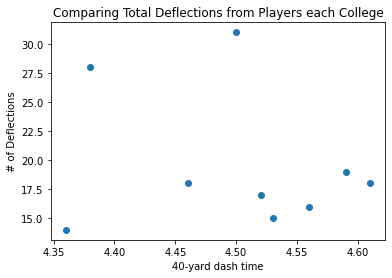

In [477]:
values = fun.get_college(df_deflections_1, 'combine40yd', df_comb)
x_vals, y_vals = [], []
for i in values[-10:]:
    x_vals.append(i[0])
    y_vals.append(i[1])

plt.scatter(x_vals, y_vals)
plt.xlabel("40-yard dash time")
plt.ylabel("# of Deflections")
plt.title("Comparing Total Deflections from Players each College")

plt.show()

<h1>Developer Inactive</h1>


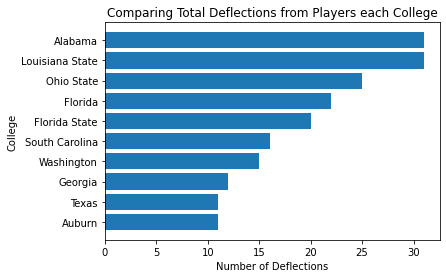

In [161]:
values = fun.get_college(df_deflections_1, 'collegeName', players)
x_vals, y_vals = [], []
for i in values[-10:]:
    x_vals.append(i[0])
    y_vals.append(i[1])

plt.barh(x_vals, y_vals)
plt.xlabel("Number of Deflections")
plt.ylabel("College")
plt.title("Comparing Total Deflections from Players each College")
plt.show()

In [34]:
weeks[weeks.week ==1].event.unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds', 'pass_outcome_incomplete',
       'first_contact', 'tackle', 'man_in_motion', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered', 'handoff',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'pass_shovel', 'line_set', 'shift', 'touchdown',
       'fumble_defense_recovered', 'pass_outcome_touchdown', 'run',
       'touchback', 'penalty_flag', 'penalty_accepted', 'qb_spike',
       'field_goal_blocked'], dtype=object)

In [137]:
# players

In [138]:
values = fun.get_college(df_int_1, 'collegeName', players)
x_vals, y_vals = [], []
for i in values[-10:]:
    x_vals.append(i[0])
    y_vals.append(i[1])

plt.barh(x_vals, y_vals)
plt.xlabel("Number of Interceptions")
plt.ylabel("College")
plt.title("Comparing Total Interceptions of Players each College")
plt.show()

IndexError: list index out of range

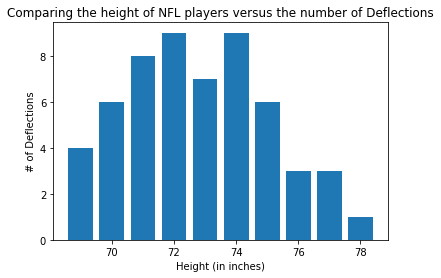

In [36]:
x_vals, y_vals = fun.get_xy(df_deflections_1, 'height', players)
plt.bar(x_vals, y_vals)
plt.ylabel("# of Deflections")
plt.xlabel("Height (in inches)")
plt.title("Comparing the height of NFL players versus the number of Deflections")
plt.show()

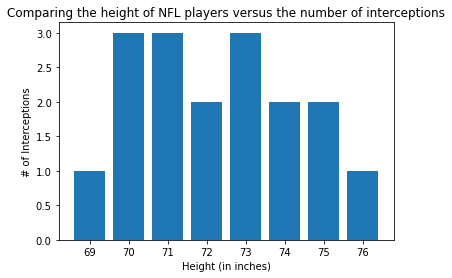

In [37]:
x_vals, y_vals = fun.get_xy(df_int_1, 'height', players)
plt.bar(x_vals, y_vals)
plt.ylabel("# of Interceptions")
plt.xlabel("Height (in inches)")
plt.title("Comparing the height of NFL players versus the number of interceptions")
plt.show()

In [38]:
# players

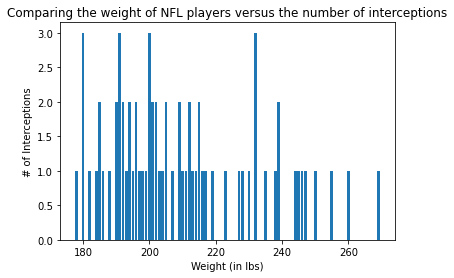

In [39]:
x_vals, y_vals = fun.get_xy(df_int_1, 'weight', players)
plt.bar(x_vals, y_vals)
plt.ylabel("# of Interceptions")
plt.xlabel("Weight (in lbs)")
plt.title("Comparing the weight of NFL players versus the number of interceptions")
plt.show()

In [40]:
# [[get_value(k, 'position'), v] for k, v in dict(df_int_1.nflId.value_counts()).items()]

In [41]:
# sorted(dict(df_int_1[['nflId']].value_counts()).items(), key=lambda pair: pair[1], reverse=True)

In [42]:
# df_int_1[['displayName']].value_counts()

In [43]:
# data

In [46]:
players.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [5]:
import http.client

conn = http.client.HTTPSConnection("api.sportradar.us")

conn.request("GET", "/nfl/official/trial/v6/en/players/0acdcd3b-5442-4311-a139-ae7c506faf88/profile.xml?api_key=vc696zw9fzf8jzj9ay43akej")

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

<?xml version="1.0" encoding="UTF-8"?>
<!-- Generation started @ 2020-12-05 21:14:24 UTC -->
<player xmlns="http://feed.elasticstats.com/schema/nfl/premium/profile-v5.0.xsd" id="0acdcd3b-5442-4311-a139-ae7c506faf88" name="Reggie Bush" jersey="22" last_name="Bush" first_name="Reggie" abbr_name="R.Bush" preferred_name="Reggie" birth_date="1985-03-02" weight="205.0" height="72" position="RB" birth_place="Spring Valley, CA, USA" high_school="Helix (CA)" college="Southern California" college_conf="Pacific Ten Conference" rookie_year="2006" status="A01">
  <references>
    <reference id="30816" origin="nflx"/>
    <reference id="BUS294963" origin="elias"/>
    <reference id="00-0024217" origin="gsis"/>
  </references>
  <draft year="2006" round="1" number="2">
    <team id="0d855753-ea21-4953-89f9-0e20aff9eb73" name="Saints" market="New Orleans" alias="NO" sr_id="sr:competitor:4425"/>
  </draft>
  <season id="8b383dbc-88ae-45b4-af94-a70729a6a9b3" year="2006" type="PST" name="PST">
    <team 

In [47]:
clean_names = fun.clean_keyword(names)

In [66]:
sorted_names = fun.count_sort(clean_names)

# Below is practice from previous

------

In [51]:
checking = players[players.position.isin(["QB", "RB", "WR", "TE"])][['position', 'displayName']]

In [305]:
keyword = "INTERCEPTED"
df_int = plays[plays.playDescription.str.contains(keyword)][['playDescription','possessionTeam', 'gameId']]
df_merge = pd.merge(df_int, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], how='inner', on='gameId')

In [224]:
keyword

'INTERCEPTED'

In [306]:
df_plays = plays[plays.playDescription.str.contains(keyword)][['playDescription','possessionTeam', 'gameId','playId']]

In [307]:
df_merge_games = pd.merge(df_plays, games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr','week']], how='inner', on='gameId')

In [308]:
week1['week'] = 1
# week1 = week1.drop(columns=['week1'])

In [309]:
df_merge_week = pd.merge(df_merge_games, week1[['gameId', 'playId','nflId', 'displayName', 'event', 'x','y', 'frameId', 'week', 'position']], on=['gameId', 'playId', 'week'])

In [310]:
df_defense = df_merge_week[~df_merge_week.position.isin(OFFENSE)]

In [311]:
df_defense = df_defense[df_defense.event == 'pass_outcome_interception']

In [254]:
def clean_description(row, keyword):
#     print(keyword, row)
    start = row.index(keyword) + len(keyword)
    word = row[start:]
#     print(word)
    word = word[:word.index(" ")]
    
    return word
    
    
    
    

    

In [312]:
df_defense.loc[:,'playDescription'] = df_defense['playDescription'].apply(lambda row: clean_description(row, 'INTERCEPTED by '))

In [313]:
def shorten(name):
    first_last = name.split(" ")
    short = first_last[0][0] + "."
    short+="".join(first_last[1:])
    return short

In [276]:
# shorten("Jacob Michal-Rick")

In [315]:
df_defense.loc[:, 'shorten_name'] = df_defense.displayName.apply(lambda row: shorten(row))

In [321]:
df_defense[df_defense.playDescription == df_defense.shorten_name].shape

(30, 15)

In [123]:
# df_merge_week[(df_merge_week.gameId == 2018090600)]

In [58]:
dname = {k:v for k, v in sorted(dict(Counter(checking)).items(), key=lambda pair:pair[1], reverse=True)}

In [59]:
dname

{'position': 1, 'displayName': 1}

In [113]:
# sorted(dict(Counter(names)).items(), key=lambda pair: pair[1], reverse=True)

In [114]:
# names

In [64]:
# te = inte[inte.frameId == 55][['x', 'y', 'nflId', 'displayName']]
# te

In [51]:
football = te[te.displayName == "Football"][['x', 'y']]
football_x = football.x.values[0]
football_y = football.y.values[0]

In [52]:
football = te[te.displayName == "Football"][['x', 'y']]
football_x = football.x.values[0]
football_y = football.y.values[0]
loc = [te.x.values, te.y.values, te.nflId.values]
def distance(x1, y1, x2, y2):
    return math.sqrt((y1 - y1)**2  + (x1-x2)**2)
dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]

In [53]:
loc = [te.x.values, te.y.values, te.nflId.values]

In [54]:
import math

In [55]:
dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]

In [56]:
np.isnan()

ValueError: invalid number of arguments

In [57]:
dist

[(21.4, 310.0),
 (16.17, 79848.0),
 (2.9300000000000015, 2495454.0),
 (5.790000000000001, 2495613.0),
 (7.0600000000000005, 2533040.0),
 (19.559999999999995, 2534832.0),
 (20.939999999999998, 2543583.0),
 (18.71, 2552315.0),
 (6.380000000000001, 2555383.0),
 (6.9, 2555415.0),
 (5.4, 2557958.0),
 (0.120000000000001, 2558168.0),
 (5.040000000000001, 2560854.0)]

In [58]:
players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]

,nflId,height,weight,birthDate,collegeName,position,displayName
44,2558168,74,209,1995-08-29,West Virginia,CB,Rasul Douglas


In [ ]:


for row in te.itertuples():
#     print(row)
    x = getattr(row, 'x')
    y = getattr(row, 'y')
    
    nflId = getattr(row, "nflId")
    
    
    
    

In [49]:
te = inte[inte.frameId == 55][['x', 'y', 'nflId', 'displayName']]
te

,x,y,nflId,displayName
56442,35.53,26.76,310.0,Matt Ryan
56443,30.30,30.04,79848.0,Malcolm Jenkins
56444,11.20,1.48,2495454.0,Julio Jones
56445,19.92,23.90,2495613.0,Corey Graham
56446,21.19,28.26,2533040.0,Mohamed Sanu
56447,33.69,32.01,2534832.0,Rodney McLeod
56448,35.07,30.84,2543583.0,Devonta Freeman
56449,32.84,30.56,2552315.0,Jordan Hicks
56450,7.75,43.95,2555383.0,Jalen Mills
56451,7.23,46.56,2555415.0,Austin Hooper


In [ ]:
# def throw_stats(plays):
stats = {}
test = plays[['possessionTeam', 'passResult', 'offensePlayResult']]
#     test.head()
passing = test[['possessionTeam', 'offensePlayResult']].groupby(by='possessionTeam', as_index=False).sum()

for team in test.possessionTeam.unique():
    stats[team] = dict(test[test.possessionTeam == team].passResult.value_counts())

#     return passing, stats
    

In [ ]:
# passing

In [ ]:
# stats

In [ ]:
# stats.values()

In [ ]:
passing.offensePlayResult = passing.offensePlayResult.apply(lambda row: row/16)

In [ ]:
ps = {}
for idx, d in enumerate(passing.to_dict(orient='records')):
    pair = list(d.values())
    values = pair
    values += [val/16 for val in list(stats[pair[0]].values())[:4]]
    ps['row{}'.format(idx)] = values

In [ ]:
pd.DataFrame.from_dict(ps, orient='index',columns=['Team', "yards", 'complete', 'incomplete', 'sack', 'intercept'])

In [ ]:
ps

In [ ]:
{list(d.values())[0] : list(d.values[1]) for d in passing.to_dict(orient='records')}

In [186]:
outcomes = ['pass_outcome_interception','pass_tipped','qb_strip_sack', 'pass_arrived','pass_forward','qb_sack', 'fumble']
pass_defend = ['pass_outcome_interception','pass_tipped']

In [193]:
# week1

In [197]:
[['x', 'y', 'nflId', 'displayName', 'playId']]

[['x', 'y', 'nflId', 'displayName', 'playId']]

In [201]:
# plays

In [203]:
# plays

In [208]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [224]:
def distance(x1, y1, x2, y2):
    return math.sqrt((y1 - y1)**2  + (x1-x2)**2)

In [220]:
final_cols = ['x', 'y','event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDescription', 'passResult']

In [235]:
def get_defender(week, action, final_cols):
    
    action_dict = {key:[] for key in action}
    
    df_action = week[week.event.isin(action)]
    df_action = df_action[~df_action.position.isin(["QB", "RB", "WR", "TE", "FB"])]
    df_merge = pd.merge(df_action, plays[['playId', 'playDescription', 'passResult']], how='inner', on='playId')

    for frame in df_merge.frameId.unique().tolist():
        df_frame = df_merge[df_merge.frameId == frame]
        football = df_frame[df_frame.displayName == 'Football'][['x','y']]
        football_x = football.x.values[0]
        football_y = football.y.values[0]
        loc = [df_frame.x.values, df_frame.y.values, df_frame.displayName.values]
#         dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]
        dist = [(distance(football_x, football_y, x, y), name) for x, y, name in zip(loc[0], loc[1], loc[2]) if name != "Football"]
        print(dist)
#         players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]   
        
#         df_action[df_merge[df_merge.frameId].event.tolist()[0]].append()
#     football = te[te.displayName == "Football"][['x', 'y']]
#     football_x = football.x.values[0]
#     football_y = football.y.values[0]
#     loc = [te.x.values, te.y.values, te.nflId.values]
#     def distance(x1, y1, x2, y2):
#         return math.sqrt((y1 - y1)**2  + (x1-x2)**2)
#     dist = [(distance(football_x, football_y, x, y), nfl) for x, y, nfl in zip(loc[0], loc[1], loc[2]) if not np.isnan(nfl)]
    return df_merge[final_cols], dist
    
    

In [226]:
players[players.nflId == min(dist, key = lambda pair: pair[0])[1]]

,nflId,height,weight,birthDate,collegeName,position,displayName
44,2558168,74,209,1995-08-29,West Virginia,CB,Rasul Douglas


In [246]:
df_action = week1[week1.event.isin(pass_defend)]
df_action = df_action[~df_action.position.isin(["QB", "RB", "WR", "TE", "FB"])]
df_merge = pd.merge(df_action, plays[['playId', 'playDescription', 'passResult', 'gameId']], how='inner', on=['playId', 'gameId'])
for frame in df_merge.frameId.unique().tolist()[:2]:
    df_frame = df_merge[df_merge.frameId == frame]
    football = df_frame[df_frame.displayName == 'Football'][['x','y']]
    football_x = football.x.values[0]
    football_y = football.y.values[0]
    loc = [df_frame.x.values, df_frame.y.values, df_frame.displayName.values]
    dist = [(distance(football_x, football_y, x, y), name) for x, y, name in zip(loc[0], loc[1], loc[2]) if name != "Football"]
#     print(dist)


In [250]:
df_merge[['frameId', 'gameId', 'playId']].drop_duplicates()

,frameId,gameId,playId
0,28,2018090600,3257
8,55,2018090600,3392
16,58,2018090600,3481
24,56,2018090902,81
33,60,2018090902,163
41,38,2018090902,372
50,57,2018090907,584
60,32,2018090906,730
68,60,2018090901,704
77,42,2018090905,757


In [244]:
df_frame

,time,x,y,s,a,dis,o,dir,event,nflId,...,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,playDescription,passResult
64,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(13:03) (Shotgun) M.Ryan pass short left inten...,IN
65,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(7:55) (Shotgun) S.Darnold pass deep left to T...,C
66,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(12:39) No. 5 - Joshua Dobbs in at QB for PIT....,C
67,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(12:53) (Shotgun) A.Rodgers pass deep left to ...,C
68,2018-09-07T03:37:32.900Z,30.30,30.04,1.93,0.80,0.19,238.34,221.00,pass_outcome_interception,79848.0,...,27.0,SS,55,home,2018090600,3392,left,NaN,(10:17) C.Keenum pass short right to A.Janovic...,C
69,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(13:03) (Shotgun) M.Ryan pass short left inten...,IN
70,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(7:55) (Shotgun) S.Darnold pass deep left to T...,C
71,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(12:39) No. 5 - Joshua Dobbs in at QB for PIT....,C
72,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(12:53) (Shotgun) A.Rodgers pass deep left to ...,C
73,2018-09-07T03:37:32.900Z,19.92,23.90,5.16,2.63,0.51,134.15,152.44,pass_outcome_interception,2495613.0,...,24.0,FS,55,home,2018090600,3392,left,NaN,(10:17) C.Keenum pass short right to A.Janovic...,C


In [240]:
df_merge.frameId.unique()

array([28, 55, 58, 56, 60, 38, 57, 32, 42, 50, 34, 40, 61, 78, 92, 69, 35,
       47, 54, 59, 62, 65, 46, 53, 72, 73, 51, 52, 45], dtype=int64)

In [236]:
df, a = get_defender(week1, pass_defend, final_cols)
# df.head()

[(11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (11.13000000000001, 'Malcolm Jenkins'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (13.170000000000002, 'Rodney McLeod'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (6.340000000000003, 'Jordan Hicks'), (14.510000000000005, 'Ronald Darby'), (14.510000000000005, 'Ronald Darb

In [234]:
a

[(14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (14.66000000000001, 'Dominique Rodgers-Cromartie'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (23.42, 'Marcus Gilchrist'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (29.64, 'Leon Hall'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (4.890000000000001, 'Derrick Johnson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, 'Reggie Nelson'),
 (17.89, '

In [ ]:
t = plays[['possessionTeam', 'passResult', 'offensePlayResult']]


In [ ]:
t[['possessionTeam', 'passResult']]

In [ ]:
p, s = throw_stats(plays)

In [ ]:
s

In [ ]:
plays.passResult.value_counts()

In [4]:
throw_stats(plays)

NameError: name 'throw_stats' is not defined

In [9]:
a = 'personnelD'#'numberOfPassRushers'
col = [a, 'offensePlayResult']
a =plays[col].groupby(by=[a], as_index=False).aggregate(['mean', 'count'])
# a[a['count'] > 1]
a[a.offensePlayResult['count'] > 3]

offensePlayResult      
                                    mean count
personnelD                                    
0 DL, 4 LB, 7 DB                4.437500    32
0 DL, 5 LB, 6 DB                5.058824    17
0 DL, 6 LB, 5 DB                2.666667     6
1 DL, 3 LB, 7 DB                5.029412   102
1 DL, 4 LB, 6 DB                5.279743   311
1 DL, 5 LB, 5 DB                4.808271   266
2 DL, 2 LB, 7 DB                4.605634    71
2 DL, 3 LB, 5 DB, 1 WR          3.750000     4
2 DL, 3 LB, 6 DB                6.279171   917
2 DL, 4 LB, 5 DB                6.076339  2109
3 DL, 1 LB, 7 DB                6.024390    82
3 DL, 2 LB, 6 DB                5.691500  1047
3 DL, 3 LB, 5 DB                5.979697  3103
3 DL, 4 LB, 4 DB                7.358008   743
4 DL, 0 LB, 7 DB                7.625000    24
4 DL, 1 LB, 6 DB                5.579710  1104
4 DL, 2 LB, 5 DB                6.316747  6652
4 DL, 3 LB, 4 DB                7.388035  2407
4 DL, 4 LB, 3 DB                5.347826    23
4 DL, 5 LB, 2 DB                0.750000     4
5 DL, 1 LB, 5 DB                9.153846    13
5 DL, 2 LB, 4 DB                5.881720    93
5 DL, 3 LB, 3 DB                7.857143    14
6 DL, 3 LB, 2 DB                0.416667    12
6 DL, 4 LB, 1 DB                0.166667    12

In [10]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [11]:
testing = plays[['gameId', 'playId', 'playDescription','passResult', 'playResult', 'offensePlayResult']]

In [12]:
# week1.head()

In [13]:
# games.head()

In [18]:
plays[(plays.playId == 75) & (plays.gameId == 2018090600)]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False


In [19]:
catch = week1[(week1.playId == 75) & (week1.gameId == 2018090600)]

In [20]:
routes = catch[['x','y','displayName']]

In [21]:
# routes


In [22]:
mryan = week1[(week1.displayName == 'Matt Ryan') & (week1.playId == 75)]

In [23]:
mx = list(mryan.x)
my = list(mryan.y)

In [24]:
min(mx), max(mx)

(91.73, 96.46)

In [24]:
names = list(routes.displayName.unique())

NameError: name 'routes' is not defined

In [27]:
# routes[routes.displayName == 'Football']

In [28]:
plays = list(week1[week1.gameId == 2018090600].playId.unique())

In [29]:
# week1[week1.gameId == 2018090600].sort_values(by=['time'])

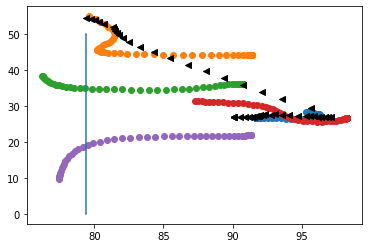

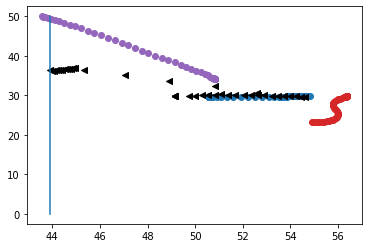

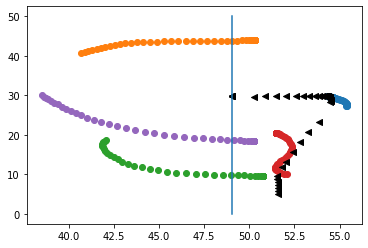

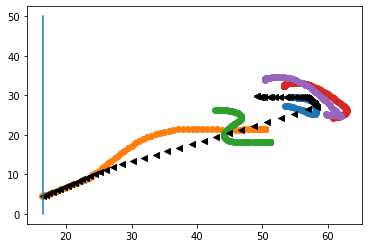

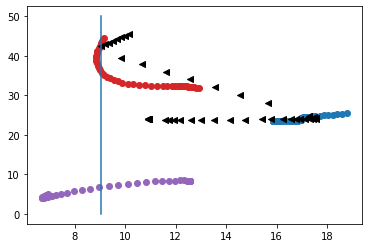

In [30]:
game_test = list(week1[week1.gameId == 2018090600].sort_values(by=['time'])['playId'].unique())
for j in game_test[:5]:
    catch = week1[(week1.playId == j) & (week1.gameId == 2018090600)]
    routes = catch[['x','y','displayName']]
    for i in names:
        if i=='Football':
            run = routes[routes.displayName == i]
            x = run.x
            y = run.y
            plt.scatter(list(x), list(y), c='black',marker='<')
            plt.plot([min(x), min(x)], [0, 50])

        elif i in list(checking.displayName):
            run = routes[routes.displayName == i]
            x = run.x
            y = run.y
            plt.scatter(list(x), list(y))


    plt.show()

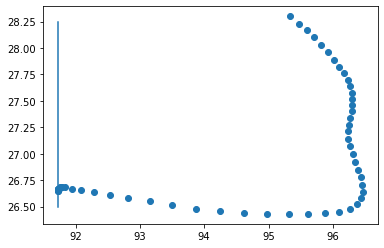

In [31]:
plt.scatter(list(mryan.x), list(mryan.y))
plt.plot([min(mx), min(mx)], [26.50, 28.25],)

In [32]:
testing.sort_values(by=['offensePlayResult'], ascending=False)

,gameId,playId,playDescription,passResult,playResult,offensePlayResult
12752,2018112509,2475,(10:47) B.Roethlisberger pass deep middle to J...,C,97,97
12011,2018112201,2897,(2:27) (Shotgun) D.Prescott pass deep middle t...,C,90,90
17665,2018123004,2619,(8:51) (Shotgun) P.Mahomes pass deep middle to...,C,89,89
14848,2018120910,1384,(10:00) (Shotgun) N.Mullens pass short right t...,C,85,85
16497,2018122310,3026,(2:32) (Shotgun) N.Foles pass deep middle to N...,C,83,83
...,...,...,...,...,...,...
13473,2018120202,3751,(8:26) M.Stafford sacked at DET 29 for -13 yar...,S,-18,-18
5599,2018100710,3875,(4:41) (Shotgun) C.Beathard sacked at SF 33 fo...,S,-41,-18
15621,2018121603,4458,(:24) (Shotgun) A.Rodgers sacked at CHI 27 for...,S,-18,-18
3026,2018092307,2712,(6:26) J.Allen sacked at BUF 42 for -13 yards ...,S,-19,-19
